In [3]:
!pip install numpy pandas scikit-fuzzy network matplotlib requests

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for network: filename=network-0.1-py3-none-any.whl size=3143 sha256=6ec8bae6c632cb538d635248b20819d1673b3c095ebba97a99048036cbe60caa
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\3a\9a\a4\341d3b109494a43a5cdd444ca83be3a4bfe8c1267ad9f85332
Successfully built network


In [8]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#Load the cleaned dataset
data = pd.read_csv('./data.csv')

# Display first 30% of the dataset
percentage = 0.3
data[:int(len(data) * percentage)]

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519248.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1228454.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,212748.0,"AD, AE, AG, AO, BH, BM, BR, BS, BZ, CI, CM, CO..."
3,Unforgiven,movie,"Drama, Western",1992.0,8.2,446602.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,1113480.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."
...,...,...,...,...,...,...,...
5681,Facet (nie)potrzebny od zaraz,movie,"Comedy, Drama, Music",2014.0,4.4,398.0,"AT, BE, BG, BM, CH, CY, CZ, DE, DK, EE, ES, FI..."
5682,The Smile of a Child,movie,"Comedy, Drama, Music",1969.0,4.8,44.0,"AL, AT, BA, BE, BG, CH, CZ, DE, DK, EE, FI, FR..."
5683,Kundo: Age of the Rampant,movie,"Action, Drama",2014.0,6.8,3954.0,KR
5684,The Mummy,movie,"Action, Adventure, Fantasy",2017.0,5.4,211329.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."


In [11]:
min_year = data['releaseYear'].min()
max_year = data['releaseYear'].max()
max_votes = data['imdbNumVotes'].max()

print(f"Release Year Range: {min_year} - {max_year}")
print(f"Number of Votes Range: 0 - {max_votes}")

# Define the universal variables
imdb_rating = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'imdb_rating')
release_year = ctrl.Antecedent(np.arange(min_year, max_year + 1, 1), 'release_year')
num_votes = ctrl.Antecedent(np.arange(0, max_votes + 1, 10000), 'num_votes')
movie_quality = ctrl.Consequent(np.arange(0, 11, 1), 'movie_quality')

Release Year Range: 1913.0 - 2024.0
Number of Votes Range: 0 - 2981119.0


In [28]:
%matplotlib inline

# IMDb Rating Membership Functions
imdb_rating['low'] = fuzz.trapmf(imdb_rating.universe, [0, 0, 3, 5])
imdb_rating['medium'] = fuzz.trimf(imdb_rating.universe, [4, 5.5, 7])
imdb_rating['high'] = fuzz.trapmf(imdb_rating.universe, [6, 8, 10, 10])

# Release Year Membership Functions
release_year['classic'] = fuzz.trapmf(release_year.universe, [min_year, min_year, 1970, 1990])
release_year['modern'] = fuzz.trimf(release_year.universe, [1985, 2000, 2010])
release_year['contemporary'] = fuzz.trapmf(release_year.universe, [2000, 2020, max_year, max_year])

# Number of Votes Membership Functions
num_votes['few'] = fuzz.trapmf(num_votes.universe, [0, 0, 50000, 150000])
num_votes['average'] = fuzz.trimf(num_votes.universe, [100000, 200000, 400000])
num_votes['many'] = fuzz.trapmf(num_votes.universe, [300000, 500000, max_votes, max_votes])

# Movie Quality Membership Functions
movie_quality['low'] = fuzz.trapmf(movie_quality.universe, [0, 0, 3, 5])
movie_quality['medium'] = fuzz.trimf(movie_quality.universe, [4, 5.5, 7])
movie_quality['high'] = fuzz.trapmf(movie_quality.universe, [6, 8, 10, 10])

C:\Users\User\anaconda\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


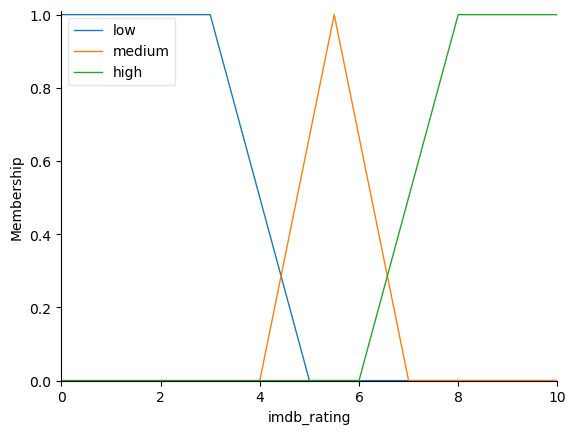

In [13]:
imdb_rating.view()
plt.show()

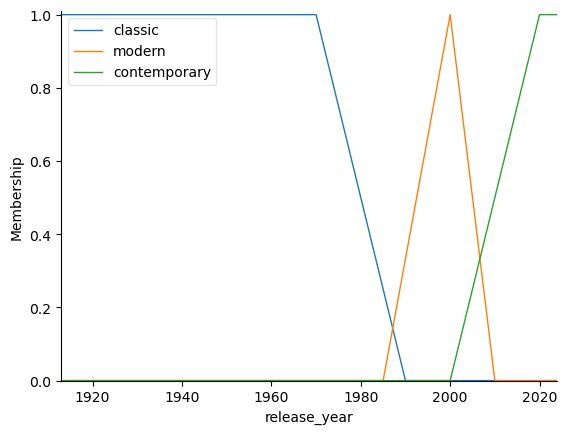

In [14]:
release_year.view()
plt.show()

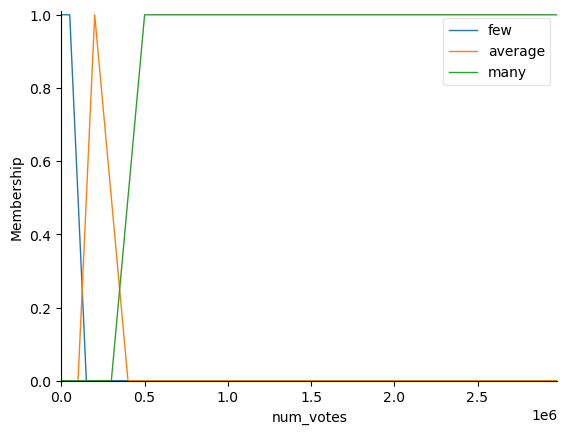

In [15]:
num_votes.view()
plt.show()

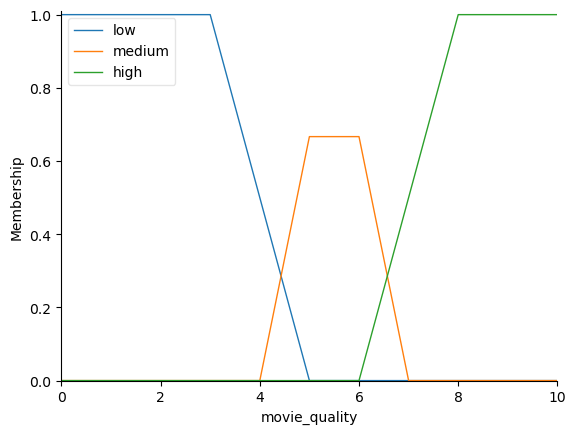

In [16]:
movie_quality.view()
plt.show()

In [17]:
rule1 = ctrl.Rule(imdb_rating['high'] & num_votes['many'], movie_quality['high'])
rule2 = ctrl.Rule(imdb_rating['medium'] & num_votes['average'], movie_quality['medium'])
rule3 = ctrl.Rule(imdb_rating['low'] & num_votes['few'], movie_quality['low'])
rule4 = ctrl.Rule(imdb_rating['high'] & release_year['classic'], movie_quality['high'])
rule5 = ctrl.Rule(imdb_rating['medium'] & release_year['modern'], movie_quality['medium'])
rule6 = ctrl.Rule(imdb_rating['low'] & release_year['contemporary'], movie_quality['low'])
rule7 = ctrl.Rule(imdb_rating['high'], movie_quality['high'])
rule8 = ctrl.Rule(imdb_rating['medium'], movie_quality['medium'])
rule9 = ctrl.Rule(imdb_rating['low'], movie_quality['low'])

In [18]:
#build the control system with all the rules
movie_quality_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9
])

In [19]:
# Function to compute movie quality
def compute_movie_quality(row):
    # Create a new simulation instance for each row
    movie_quality_simulation = ctrl.ControlSystemSimulation(movie_quality_ctrl)

    # Initialize variables
    imdb_rating_value = None
    release_year_value = None
    num_votes_value = None

    try:
        # Set input values
        imdb_rating_value = row['imdbAverageRating']
        release_year_value = row['releaseYear']
        num_votes_value = row['imdbNumVotes']

        # Clip inputs to universes
        imdb_rating_value = np.clip(imdb_rating_value, imdb_rating.universe[0], imdb_rating.universe[-1])
        release_year_value = np.clip(release_year_value, release_year.universe[0], release_year.universe[-1])
        num_votes_value = np.clip(num_votes_value, num_votes.universe[0], num_votes.universe[-1])

        # Set inputs
        movie_quality_simulation.input['imdb_rating'] = imdb_rating_value
        movie_quality_simulation.input['release_year'] = release_year_value
        movie_quality_simulation.input['num_votes'] = num_votes_value

        # Compute the fuzzy result
        movie_quality_simulation.compute()

        return movie_quality_simulation.output['movie_quality']

    except Exception as ex:
        print(f"Error computing for row {row.name}: {ex}")
        print(f"Inputs: imdb_rating={imdb_rating_value}, release_year={release_year_value}, num_votes={num_votes_value}")
        return np.nan

# Apply the fuzzy logic model to the dataset
data['movie_quality_score'] = data.apply(compute_movie_quality, axis=1)

In [21]:
data.head

<bound method NDFrame.head of                                             title   type  \
0                               The Fifth Element  movie   
1                               Kill Bill: Vol. 1  movie   
2                                         Jarhead  movie   
3                                      Unforgiven  movie   
4           Eternal Sunshine of the Spotless Mind  movie   
...                                           ...    ...   
18950                                  S.E.R.E.G.     tv   
18951                            The Later Daters     tv   
18952  The Kings of Tupelo: A Southern Crime Saga     tv   
18953                              UniverXO Dabiz     tv   
18954           Das Boot - Die komplette TV-Serie     tv   

                          genres  releaseYear  imdbAverageRating  \
0      Action, Adventure, Sci-Fi       1997.0                7.6   
1        Action, Crime, Thriller       2003.0                8.2   
2          Biography, Drama, War       2005.0

In [22]:
# Define a function to classify the movies
def classify_movie(score):
    if score >= 6.0:
        return 'High'
    elif score >= 4.0:
        return 'Medium'
    else:
        return 'Low'

# Apply the classification
data['movie_quality_category'] = data['movie_quality_score'].apply(classify_movie)

In [23]:
# Display the top 10 movies with the highest quality scores
top_movies = data.sort_values(by='movie_quality_score', ascending=False)
# save the top movies to a csv file
top_movies.to_csv('./top-movies.csv', index=False)


top_movies[['title', 'imdbAverageRating', 'releaseYear', 'imdbNumVotes', 'movie_quality_score', 'movie_quality_category']].head(10)

,title,imdbAverageRating,releaseYear,imdbNumVotes,movie_quality_score,movie_quality_category
18954,Das Boot - Die komplette TV-Serie,8.7,1985.0,161.0,8.444444,High
15326,Oshi No Ko,8.3,2023.0,10951.0,8.444444,High
1271,Cosy Dens,8.1,1999.0,6406.0,8.444444,High
1269,Army of Shadows,8.1,1969.0,27057.0,8.444444,High
15344,Banana Fish,8.2,2018.0,9551.0,8.444444,High
15351,If My Wife Becomes an Elementary School Student.,8.1,2022.0,217.0,8.444444,High
1263,The Red Balloon,8.1,1956.0,20662.0,8.444444,High
15355,Yellowstone,8.6,2018.0,249367.0,8.444444,High
15356,The Rookie,8.0,2018.0,86633.0,8.444444,High
15360,Jujutsu Kaisen,8.5,2020.0,139021.0,8.444444,High


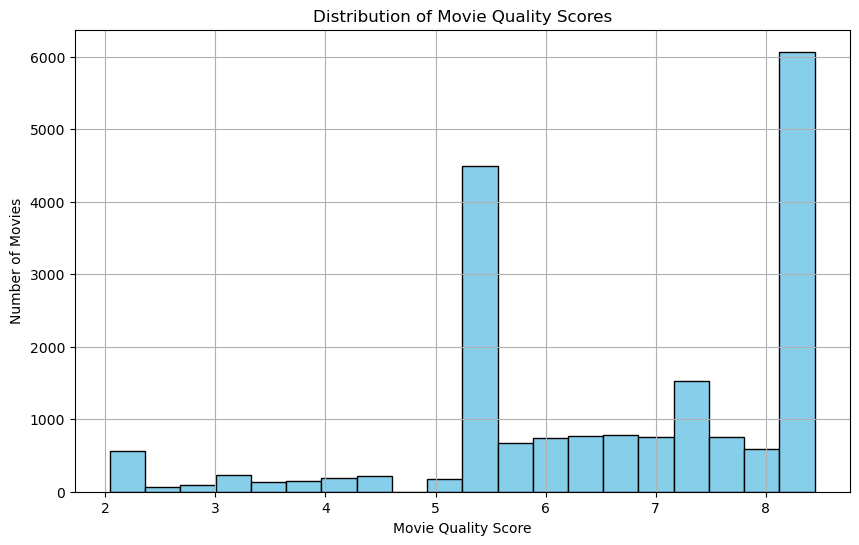

In [24]:
# Plot the distribution of movie quality scores
plt.figure(figsize=(10,6))
plt.hist(data['movie_quality_score'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Quality Scores')
plt.xlabel('Movie Quality Score')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

Movie Quality Category Counts:
movie_quality_category
High      11988
Medium     5736
Low        1231
Name: count, dtype: int64


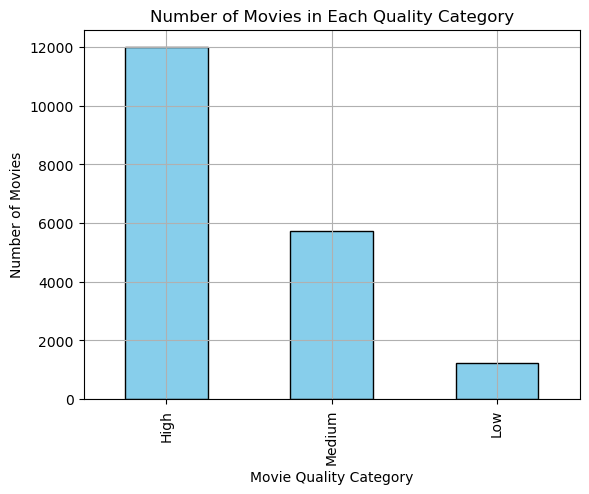

In [25]:
# Count the number of movies in each category
category_counts = data['movie_quality_category'].value_counts()
print("Movie Quality Category Counts:")
print(category_counts)

# Plot the counts
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Movies in Each Quality Category')
plt.xlabel('Movie Quality Category')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()